# Multiple Linear Regression

In this R Jupyter notebook, we go through the code implementation for a multiple linear regression analysis. In particular, we are interested in whether we can explain or predict midterm 2 scores by both midterm 1 scores AND gender.

## 1. Loading the data

If the data size is not large, it may be convenient to make two data vectors manually as follows.

In [1]:
midterm1 <- c(23, 22.5, 21.5, 21.25, 13, 25, 14.5, 20, 18, 18, 19.5, 
              25, 23, 19, 24, 20, 24, 24, 18.5, 18, 16, 21.85, 25, 19.5) # explanatory variable 1

gender <- c(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1) # explanatory variable 2

midterm2 <- c(21.5, 20, 21, 21.32, 12.7, 25, 18.5, 24, 15.5, 18, 23, 23, 
              17.9, 13.5, 22, 22.5, 21.5, 18.5, 18.5, 20, 17.5, 20.5, 16.5, 20) # response variable

If the data size is not small enough for a manual input, we have to load the data. The following is an example of loading the data "midterm2.csv" from my desktop folder. Please refer to the previous jupyter notebook for "Simple Linear Regression", which contains details of loading the data.

In [2]:
setwd("~/Desktop/")
midterm <- read.csv("midterm2.csv", header = TRUE)
head(midterm)
midterm1 <- midterm[, 1]
midterm2 <- midterm[, 2]
gender <- midterm[, 3]

,midterm2,midterm1,gender
,<dbl>,<dbl>,<int>
1,21.50,23.00,0
2,20.00,22.50,0
3,21.00,21.50,0
4,21.32,21.25,0
5,12.70,13.00,0
6,25.00,25.00,0


For Window users, the fist line of the code above is replaced with

setwd("C:/Users/hyungsuktak/Desktop/")

If the data file is a .txt file, then the following code will be used instead.

midterm <- read.table("midterm.txt", header = TRUE)

To check whether the data are correctly loaded, we use the function "head" that shows the first six lines of the data. To avoid any mistake, it is better to check whether the first row is correctly loaded. In this case, the first row correctly starts with (23, 21.5, 0).

Next, we designate each column of the data to an object, as we input manually in the beginning. 

Now the data are loaded, and we are ready to conduct a multiple linear regression analysis.

## 2. Visualizing the data

In a multiple linear regression analysis, the most important plot is a pairwise scatter plot of $Y$ on $X_i$'s (exploratory variables). To add  more information to a common scatter plot, we define two functions as follows. Please copy and paste without any modifications.

In [3]:
panel.hist <- function(x, ...)
{
    usr <- par("usr")
    on.exit(par(usr))
    par(usr = c(usr[1 : 2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts
    y <- y / max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = "grey", ...)
}

panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
    usr <- par("usr")
    on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- cor(x, y)
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8 / strwidth(txt)
    text(0.5, 0.5, txt, cex = 2)
}

Using these two functions, we can insert more information to a scatter plot using the code below.

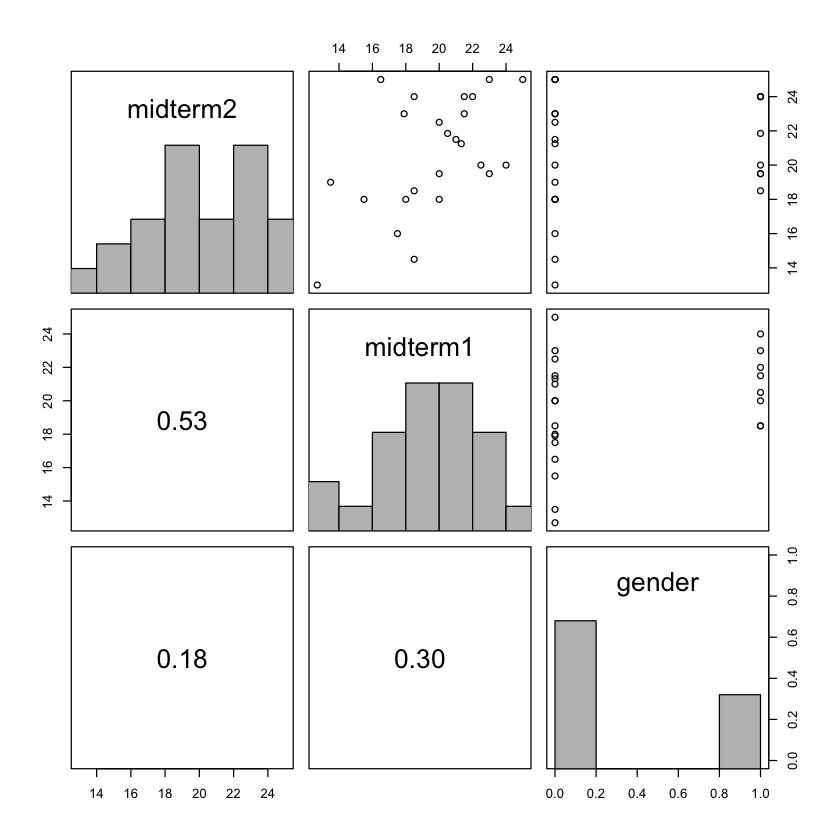

In [4]:
pairs(cbind(midterm2, midterm1, gender), diag.panel = panel.hist, lower.panel = panel.cor)

The first argument is a data matrix, containing all the variables column-wise. The function "cbind" constructs a matrix column-wise, i.e., filling out the first column by midterm2, the second column by midterm1, and the last column by gender.

The second argument "diag.panel = panel.hist" draws histograms in diagonal panels, and the third argument "lower.panel = panel.cor" displays correlations in the lower triangle panels. These two arguments are generic, so these do not need to be modified when other data sets are used.

The most important information comes with the row of the response variable, i.e., the first row in the scatter plot above. This is because it shows the marginal relationships between response variable and each exploratory variable, which gives insight into possible regression models. It seems reasonable to assume a linear relationship between midterm2 and midterm1, as discussed in the previous Jupyter notebook. It also appears that a linear relationship might exist between midterm2 and gender because the average midterm2 score of female students (gender = 1) looks higher than that of male students (gender = 0).



## 3. Fitting a multiple linear regression model

Linear trends identified in the pairwise scatter plot justify using a multiple linear regression model without any transformation of explanatory variables. 

In [5]:
res <- lm(midterm2 ~ midterm1 + gender)

The code above fits the following multiple linear regression model and saves the fitting result in the object "res":

$$
Y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon_i=x_i^{\top}\beta+\epsilon_i,
$$

where $Y_i$ is the midterm 2 score, $x_{i1}$ is the midterm 1 score, $x_{i2}$ is the indicator variable for female of the $i$-th person. The assumptions on the error terms are the same as those in the simple linear regression, i.e., $\epsilon_i\stackrel{\textrm{iid}}{\sim}N(0, \sigma^2)$. The model also shows the matrix notation: $x_i=(1, x_{i1}, x_{i2})^{\top}$ and $\beta=(\beta_0, \beta_1, \beta_2)^{\top}$. We note that vectors are basically column vectors (default in mathematics). In this model, $\beta_0, \beta_1, \beta_2$, and $\sigma^2$ are unknown parameters.

To see the fitting result, let's type the following line.

In [6]:
summary(res)


Call:
lm(formula = midterm2 ~ midterm1 + gender)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3771 -2.2673  0.0129  1.9476  6.2430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   9.5162     4.0347   2.359   0.0281 *
midterm1      0.5601     0.2084   2.687   0.0138 *
gender        0.1415     1.3502   0.105   0.9175  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.97 on 21 degrees of freedom
Multiple R-squared:  0.2798,	Adjusted R-squared:  0.2112 
F-statistic:  4.08 on 2 and 21 DF,  p-value: 0.03185


First of all, we check whether the the proposed model is meaningful (or statistically significant) overall. The $F$-test checks whether AT LEAST ONE of the explanatory variables is meaningful (non-zero) in explaning  variability of the response variable (midterm 2) or not. The result of the $F$-test on the bottom ($p$-value = 0.03185 < 0.05) shows that we can reject "$H_0: \beta_1=\beta_2=0$" at the 5% significance level ($\alpha=0.05$). 

The model explains 27.98% of the midterm2 variability, considering the value of $R^2$ (see $\texttt{Multiple R-squared}$ above). In a multiple regression setting, "$\texttt{Adjusted R-squared}$" is also useful because adding an explanatory variable always increases $R^2$ even when the added explanatory variable is useless. The adjusted $R^2$ is a version of $R^2$ that includes a penalty for unnecessary explanatory variables so that it does not always increase. Note that Adjusted $R^2$ is much smaller than $R^2$ in the output above.

At $\alpha=0.05$, both  $\beta_0$ and  $\beta_1$ are significantly different from zero based on their $t$-tests because both $p$-values (0.01283 and 0.00791) are smaller than $\alpha=0.05$. Thus, WHEN ALL OTHER EXPLANATORY VARIABLES ARE HELD CONSTANT (i.e., when gender is fixed or within a sub-population defined by gender), a unit increase in midterm1 changes the mean of midterm2 by 0.5601.

However, $\beta_2$ is not significantly different from zero. It means that WHEN ALL OTHER EXPLANATORY VARIABLES ARE HELD CONSTANT (i.e., when midterm1 is fixed or within a sub-population defined by midterm1), the mean of midterm2 does not have a linear relationship with gender. It also shows that the previous $F$-test was significant because  $\beta_1$ was significant, not because of both $\beta_1$ and $\beta_0$ were significant. Note that the alternative hypothesis of $F$-test was that AT LEAST ONE exploratory variable is significant, not that ALL explanatory variables are significant.

Since a multiple linear regression model is a multivarate model, it is tricky to visulalize the fitting result.

## 4. Selecting a model

After seeing the first fitting result based on the entire set of available exploratory variables, now is the time to conduct a model selection process, e.g., by Akaike Information Criteria. Once a model (or equivalently a set of explanatory variables) is selected, we diagnose the model before we make any inference. But let us postpone the model selection to the end of this jupyter notebook for an illustrative purpose.


## 5. Diagnosing the fitted model

It is always desirable to diagnose the fitted model to see whether the model assumptions are supported by the data. The key assumptions of the linear regression model are represented in the error terms.

$$
\epsilon_i\stackrel{\textrm{iid}}{\sim}N(0, \sigma^2)
$$

That means, we assume (1) independence among the measurements, (2) linearity (i.e., $E(\epsilon_i)=0$), (3) Normality, and (4) constant variance (i.e., $Var(\epsilon_i)=\sigma^2$ for all $i$). The following code is mainly used for a model check in R.

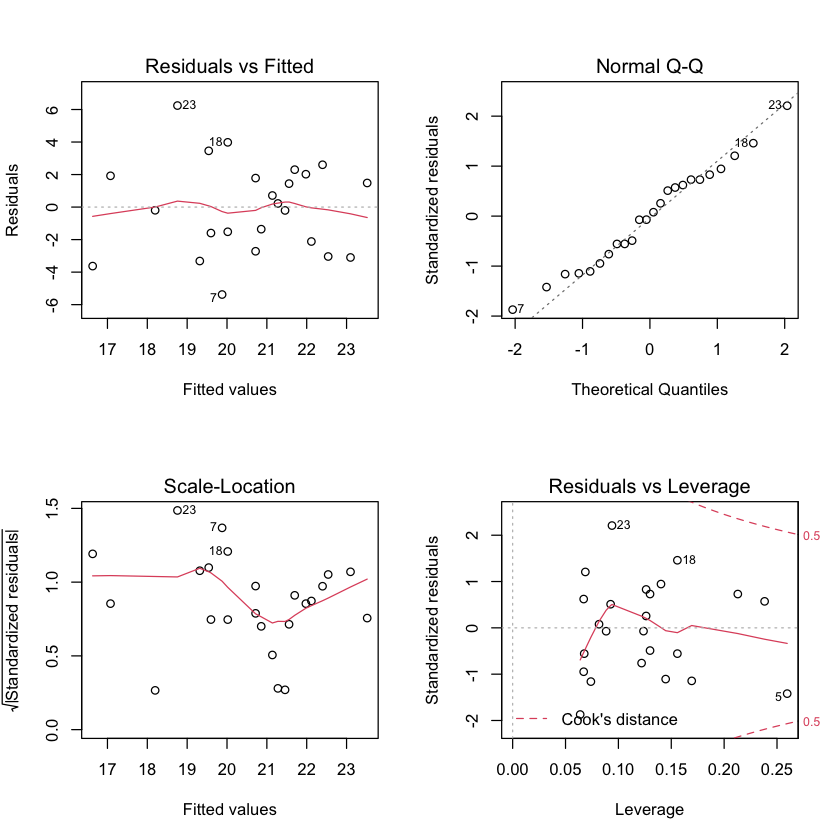

In [7]:
par(mfrow = c(2, 2))
plot(res)

The function "par" adjust the plot setting. The first argument "mfrow = c(2, 2)" tells R to divide the plot into 2 by 2 panels, and to fill out each panel row by row (the first row with two panels will be filled out first, and then next row with two panels will be filled out).

The function "plot(res)" returns four plots (which will be displayed in the 2 by 2 panels); a residual plot (top-left, residuals over fitted values), QQ-plot (top-right), scale-location plot (bottom-left), and a plot for checking influence of each observation (bottom-right, Cook's D over leverage).

In the residual plot on the top-left panel, there is no clear pattern remaining. So, independence and linearity appear satisfactory. Also, except observation 23, most data points seem to be spread within some horizontal bounds, meaning that the constant-variance assumption is also satisfactory. 

The QQ-plot on the top-right panel can be used to check the Normality. Most data points are spread near the dotted line, so the Guassian assumption seems fine. On the bottom-left corner, a few points are above the dotted line, meaning that the distribution of redisuals has the shorter left tail than a Normal distribution has. 

The scale-location plot is mainly used to check the constant variance. Although the spead seems to decrease ad the fitted value increases, it may be because there are not many data points for large fitted values. Considering the small sample size, based only on this plot it is hard to conclude  that the constant-variance assumption is violoated. 

The last plot shows whether there are influential observations that unduly affect the paramter estimation. No dots  are outside the boundary of Cook's distance 0.5, so there is no clear evidence of influential observations.

Each panel shows some observation numbers, e.g., 7, 18, 23. We have to pay attention to them because they can be the potential reasons for violating the assumptions. Let us investigate these three observations one by one. Observation 7 is a male whose midterm 2 score  increased to 18.5 from midterm 1 score 14.5. Observation 18 is a female whose midterm 2 score  decreased to 18.5 from midterm 1 score 24. Observation 23 is a male whose midterm score decreased to 16.5 from midterm 1 score 25. Overall, we can learn that these three people are those who received quite different midterm 2 scores, compared to their midterm 1 scores; the two largest changes among male people and one largest change among female people.

Overall, we think that the model fit is satisfactory, considering that the sample size is not quite large. The red flags on three observaiotns (7, 18, 23) may be due to the small sample size ($n=24$). This is because it might be possible that these three observations would not be flagged if we gathered more data points.


## 5. Making inferences

Since the residual analysis looks fine, let us start making some inferences. We can compute $100(1-\alpha)$% confidence intervals for the two regression coefficients as follows. We set $\alpha=0.05$.

In [8]:
confint(res, level = 0.95)

,2.5 %,97.5 %
(Intercept),1.1255781,17.9067397
midterm1,0.1265848,0.9935221
gender,-2.6664638,2.9494030


The function "confint" returns 95% confidence intervals of regression coefficients with a designated confidence level. If you want to see only three decimal places, the following code will be useful.

round(confint(res, level = 0.95), 3)

The function "round" displays numeric values with the designated number of decimal places.

The first row shows a 95% confidence interval for $\beta_0$, the second row exhibits that for $\beta_1$, and the third row exhibits that for $\beta_2$. That means, each interval is one of hypothetical intervals that can be computed by different realizations of the data, where 95% of the hypothetical intervals are expected to contain the true parameter value.

We can also compute a 95% confidence interval for the value on true linear line at some specific values of midterm 1 and gender, i.e., $E(\hat{Y}_\ast)=\beta_0+\beta_1x_{\ast, 1}+\beta_2x_{\ast, 2}$. Let us calculate such an interval at $x_{\ast, 1}=25$ and $x_{\ast, 2}=1$.

In [9]:
predict(res, newdata = data.frame(midterm1 = 25, gender = 1), interval = "confidence", level = 0.95)

,fit,lwr,upr
1,23.65896,20.87066,26.44727


The function "predict" returns confidence intervals for the values on the true regression line or prediction intervals for some designated values $x_\ast$'s. The first argument is the object containing the fitted result, the second argument "newdata" sets up a data set on which we compute intervals, the third argumetn "interval" designates whether we compute intervals for the values on the true regression line or intervals for predictions; "confidence" returns the former and "prediction" shows the latter.

The fitted value $\hat{y}_\ast$ (i.e., the value on the fitted least square plane) at $x_{\ast, 1}=25$ and $x_{\ast, 2}=1$ is 23.65896, which is an estimate for the value on the true regression line at $x_{\ast, 1}=25$ and $x_{\ast, 2}=1$. A 95% confidence interval for $\beta_0+\beta_1x_{\ast, 1}+\beta_2x_{\ast, 2}$ is (20.87066, 26.44727).

First, we use the function "line" to draw a curve for lower bounds. The first argument is the grid of values of midterm 1, and the second argument is a vector for the corresponding lower bounds. Note that the second column of the object "$\texttt{conf.band}$" contains the lower bounds. The function "line" draws a line connecting these dots, i.e., a curve for the lower bounds. The third argument defines the color of the curve, and the last argument "lty" defines the type of the curve ("2" is a dashed curve and "3" is a dotted curve). 

Similarly, we draw a curve for the upper bounds.

If we want to display a legend with several objects, we make vectorize inputs via "c".

The prediction interval can be obtained similarly at $x_{\ast, 1}=25$ and $x_{\ast, 2}=1$ as follows.

In [10]:
predict(res, data.frame(midterm1 = 25, gender = 1), interval = "prediction", level = 0.95)

,fit,lwr,upr
1,23.65896,16.88243,30.43549


## 6. Selecting a model (continued from section 4)

It is often the case that not all available exploratory variables are significant, as shown in the fitting result in section 3. Thus, a multiple linear regression involves a model selection procedure (i.e., pruning useless exploratory variables and keeping only useful exploratory variables). 

R's default model selection function is the "step" function below. The default selection criterion is the Akaike Information Criteria (AIC) defined as

$$
\textrm{AIC} = -2\ell(\hat{\theta})+2p=(\textrm{goodness-of-fit})+(\textrm{penalty}),
$$

where $\ell(\hat{\theta})$ is the maximized log likelihood (evaluated at the MLE $\hat{\theta}$) and $p$ is the number of parameters (length  of vector $\theta$). The penalty term increases as the complexity of the model grows, and thus compensates for the necessary increase in the likelihood. A model with the "smallest AIC" i.e., a model that explains the data well with a small number of parameters, is preferred. 

If we want to use Bayesian Information Criteria, we need to add an argument "$\texttt{k = log(24)}$" in the fucntion "step" below.

In [11]:
res.back <- step(res, direction = "backward")

Start:  AIC=55.05
midterm2 ~ midterm1 + gender

           Df Sum of Sq    RSS    AIC
- gender    1     0.097 185.33 53.058
<none>                  185.23 55.045
- midterm1  1    63.680 248.91 60.137

Step:  AIC=53.06
midterm2 ~ midterm1

           Df Sum of Sq    RSS    AIC
<none>                  185.33 53.058
- midterm1  1    71.875 257.20 58.923


The first argument is the object where the original fitted result was saved. The argument "direction" can designate one of the three sequential procedures; "forward", "backward", and "both".

The forward selection procedure starts with a constant mean (i.e., $\beta_0$ only) as its current model and adds explanatory variables one at a time until no further addition significantly improves the fit. 

In the backward elimination method, the initial current model contains all possible explanatory variables, and deletes explanatory variables one at a time until no further removal significantly improves the fit.

The stepwise method (corresponding to "both") starts with the constant mean model with no explanatory variables, and repeats  one forward selection and one backward elimination until no explanatory variables can be added or removed.

In practice, the backward elimination method is commonly used because it gives every exploratory variable a chance to be considered at least once in the model.

The result above shows that the first step of the procedure starts with the full model with all available exploratory variables, i.e., midterm1 and gender. In this step, it tries removing one exploratory variable at a time computing AIC. The negative sign infront of the variable name (e.g., - gender) means that the resulting AIC was obtained by removing the variable. For example, AIC 53.058 is obtained when we remove gender from the full model. It turns out that removing gender achieves the smallest AIC.

So the second step starts with the model with only  midterm1. Similarly, in this step, it tries removing one exploratory variable (midterm1) and computes AIC. It turns out that the resulting AIC becomes higher if we remove midterm1. Because the procedure cannot improve AIC (getting smaller AIC), the model selection procedrue stops there. The final model with only midterm1 is saved in "res.back".

In [12]:
summary(res.back)


Call:
lm(formula = midterm2 ~ midterm1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4164 -2.3291 -0.0247  1.9629  6.2170 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.4323     3.8647   2.441  0.02317 * 
midterm1      0.5667     0.1940   2.921  0.00791 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.902 on 22 degrees of freedom
Multiple R-squared:  0.2794,	Adjusted R-squared:  0.2467 
F-statistic: 8.532 on 1 and 22 DF,  p-value: 0.007914


We note that this result is the same as the one we learned in the jupyter notebook for a simple linear regression. The remaining analyses will be the same (model diagnosis and inferences).